<a href="https://colab.research.google.com/github/VanRomero90/Prototype/blob/main/Tendenciasdecompra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importar DataFrame**

In [133]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/CheckPoint/OCdef.csv', sep=',')
df.shape

(120413, 17)

In [ ]:
df.head(5)

**LIMPIAR NAN**

In [ ]:
df.isna().sum()

In [ ]:
df2 = df.drop(columns=['num_pedido','no_cesta'])
df2.isna().sum()

In [ ]:
df2['proveedor'] = df2['proveedor'].fillna('0')
df2['condic_pago'] = df2['condic_pago'].fillna('Sin Condic')
df2['no_material'] = df2['no_material'].fillna('0')
df2['org_compras'] = df2['org_compras'].fillna('Unknown')
df2['solicitante'] = df2['solicitante'].fillna('Unknown')
df2.isna().sum()

In [192]:
df2['proveedor'] = df2['proveedor'].astype(int)

In [193]:
df2.shape

(120413, 15)

In [ ]:
df2.head(5)

**IMPORTAR DATAFRAME CON CENTROS DE COSTOS**

In [195]:
cecos = pd.read_csv('/content/drive/MyDrive/CheckPoint/OC_CECO.csv', sep=',')

**MERGE OC con CECOS**

In [196]:
df_ceco = pd.merge(left=df2,right=cecos, how='left', left_on='oc', right_on='oc')
df_ceco

,oc,sociedad,fecha_oc,usuario,proveedor,condic_pago,moneda,costo_total_OC,tipo_pedido,cto_total,no_material,material,ctd_pedido,org_compras,solicitante,ceco
0,4513263281,MX16,23/09/2020,RBTRFC00GE4,100907320,Z001,MXN,0.0,ZME,36568.00,5e+07,MIXTO,6.530,Unknown,Unknown,NaN
1,4513269117,MX16,23/09/2020,RBTRFC00GE4,100791430,Z001,MXN,0.0,ZME,43893.30,5.3e+07,ACOP - MIXTO P/PROCESAR,8.490,Unknown,Unknown,NaN
2,4513264639,MX16,23/09/2020,RBTRFC00GE4,101007135,Z001,MXN,0.0,ZME,64792.00,5.3e+07,ACOP - MIXTO P/PROCESAR,12.460,Unknown,Unknown,NaN
3,4513266527,MX16,23/09/2020,RBTRFC00GE4,100793078,Z001,MXN,0.0,ZME,35961.70,5.3e+07,ACOP - MIXTO P/PROCESAR,6.635,Unknown,Unknown,NaN
4,4513265663,MX16,23/09/2020,RBTRFC00GE4,100782339,Z001,MXN,0.0,ZME,21915.00,5.3e+07,ACOP - REBABA ACERO,4.500,Unknown,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120408,4512255290,MX16,15/01/2020,JLOPEZ10,100791430,Z001,MXN,0.0,ZME,14549.85,5.3e+07,ACOP - MIXTO P/PROCESAR,3.255,Unknown,Unknown,NaN
120409,4512262923,MX16,16/01/2020,JLOPEZ10,0,Sin Condic,MXN,0.0,ZMTR,92204.87,5e+07,MIXTO,28.940,Unknown,Unknown,NaN
120410,4512252188,MX16,14/01/2020,MCID1,100840113,Z001,MXN,0.0,ZME,7920.00,5.3e+07,ACOP - MIXTO P/PROCESAR,1.800,Unknown,Unknown,NaN
120411,4512253341,MX16,15/01/2020,JMARTI13,100717197,Z001,MXN,0.0,ZME,163165.50,5e+07,MIXTO,32.310,Unknown,Unknown,NaN


**INCLUIR CECOS**

In [197]:
df_ceco['ceco'] = df_ceco['ceco'].fillna('0')

In [ ]:
df_ceco.isna().sum

In [199]:
desc_cecos=pd.read_csv('/content/drive/MyDrive/CheckPoint/Desc_ceco2.csv', encoding = "ISO-8859-1")


In [200]:
desc_cecosd = desc_cecos.drop(columns=['sociedad'])

In [ ]:
df_ccompra = pd.merge(left=df_ceco,right=desc_cecosd, how='left', left_on='ceco', right_on='ceco')
df_ccompra.head(3)

In [203]:
df_ccompra['descripción'] = df_ccompra['descripción'].fillna('Sin CeCo')
df2.isna().sum()

oc                0
sociedad          0
fecha_oc          0
usuario           0
proveedor         0
condic_pago       0
moneda            0
costo_total_OC    0
tipo_pedido       0
cto_total         0
no_material       0
material          0
ctd_pedido        0
org_compras       0
solicitante       0
dtype: int64


**DEFINIR  DATOS**

In [204]:
df_ccompra['fecha_oc'] = pd.to_datetime(df_ccompra['fecha_oc'])

In [205]:
df_time= df_ccompra.sort_values('fecha_oc', ascending=True)

In [ ]:
df_time.reset_index

**Limpieza de Usuarios**

In [ ]:
df_time['usuario'].value_counts()

In [208]:
df_filtrado = df_time[~df_time['usuario'].str.contains('RBTRFC00GE4')] 

In [ ]:
df_filtrado['usuario'].value_counts()

In [210]:
df_filtrado.shape                         

(78460, 17)

**Tipo de pedido**

In [ ]:
desc_ped=pd.read_csv('/content/drive/MyDrive/CheckPoint/Tipos de Pedido.csv', encoding = "ISO-8859-1")
df_filtrado = pd.merge(left=df_filtrado,right=desc_ped, how='left', left_on='tipo_pedido', right_on='condic_pago')
df_filtrado.head(50)

In [212]:
df_filtrado2 = df_filtrado[~df_filtrado['tipo_pedido'].str.contains('ZME')] 

In [213]:
df_filtrado3 = df_filtrado2[~df_filtrado2['tipo_pedido'].str.contains('ZMTR')] 

In [214]:
df_filtrado4 = df_filtrado3[~df_filtrado3['tipo_pedido'].str.contains('ZTR3')] 

In [215]:
df_filtrado5 = df_filtrado4[~df_filtrado4['tipo_pedido'].str.contains('ZMTE')] 

In [216]:
df_filtrado6 = df_filtrado5[~df_filtrado5['tipo_pedido'].str.contains('ZTR2')] 

In [217]:
df_costos = df_filtrado6[df_filtrado6['cto_total'] > 0]

In [218]:
df_costos.shape

(57800, 19)

In [ ]:
df_costos.head(8)

In [221]:
df_costos = df_costos.reset_index(drop=True)

In [222]:
df_usd= df_costos[df_costos['moneda'].str.contains('USD')] 

In [223]:
df_eur= df_costos[df_costos['moneda'].str.contains('EUR')] 

In [224]:
df_mxn= df_costos[df_costos['moneda'].str.contains('MXN')] 

In [225]:
df_mxn.head(4)

,oc,sociedad,fecha_oc,usuario,proveedor,condic_pago_x,moneda,costo_total_OC,tipo_pedido,cto_total,no_material,material,ctd_pedido,org_compras,solicitante,ceco,descripción,condic_pago_y,Desc_ped
0,4512333669,MX16,2020-01-02,OPERACAO,100002127,Z090,MXN,0.0,ZNB,25800.00,1.00105e+07,"TRAPO DE 1RA., ALGODON, CORTE CAMISETA",1000.0,PR03,JOSEMONT,0,Sin CeCo,ZNB,Pedido Auto -eco
2,4512333706,MX16,2020-01-02,OPERACAO,100333269,Z090,MXN,0.0,ZNB,1005.00,1.00004e+07,ANILLO O-RING 2-224,300.0,PR03,JOSEMONT,0,Sin CeCo,ZNB,Pedido Auto -eco
3,4512333521,MX16,2020-01-02,OPERACAO,100330604,Z010,MXN,0.0,ZNB,6028.42,0,Automatic Generation - Freight Service,1.0,Unknown,Unknown,0,Sin CeCo,ZNB,Pedido Auto -eco
5,4512333517,MX16,2020-01-02,OPERACAO,100674092,Z011,MXN,0.0,ZNB,5925.81,0,Automatic Generation - Freight Service,1.0,Unknown,Unknown,0,Sin CeCo,ZNB,Pedido Auto -eco


In [226]:
df_group_ceco=df_mxn.groupby(['ceco','proveedor'])['cto_total'].agg('sum')

In [227]:
df_group_ceco.head(8)

ceco          proveedor
1.203002e+09  100000516    2080672.39
              100001375       4795.00
              100001578     142830.00
              100050798      27226.00
              100322490      35248.00
              100345876    3085628.13
              100347383    1903776.39
              100354245       2089.34
Name: cto_total, dtype: float64

In [228]:
df_group_usuario=df_mxn.groupby(['usuario','proveedor'])['cto_total'].agg('sum')

In [229]:
df_group_usuario.head(8)

usuario   proveedor
AAGUILER  100990568    4.381520e+03
AAVILA3   100360285    5.183814e+05
AAVILES   100001542    1.646625e+05
          100456766    1.417361e+06
          100481175    2.871449e+07
          100731588    2.947700e+08
          100800424    9.582132e+07
          100843123    2.011550e+08
Name: cto_total, dtype: float64

In [230]:
df_group_pedido=df_mxn.groupby(['tipo_pedido','usuario'])['cto_total'].agg('sum')

In [231]:
df_group_pedido.head

<bound method NDFrame.head of tipo_pedido  usuario 
NB           AHERNAN1       68935.00
             INIETO         14700.00
             LTREJO      16002526.72
             NORAMOS        27993.60
ZDE          AHERNAN1     1063536.07
                            ...     
ZPE          JMORALE1     3472720.04
             LNAVARR1    41674839.20
             NHERNAN3     3157013.98
             SIDARG      11886415.61
ZTRT         LTREJO         58837.38
Name: cto_total, Length: 138, dtype: float64>

In [233]:
df_group_tipopes=df_mxn.groupby(['tipo_pedido'])['cto_total'].agg('sum')

**Graficar**

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Importe Imputado')

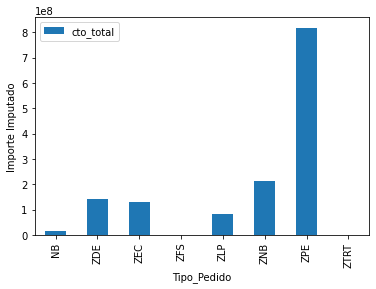

In [235]:
df_mxn.groupby(['tipo_pedido'])['cto_total'].agg('sum').plot(kind='bar',legend='Reverse')
plt.xlabel('Tipo_Pedido') 
plt.ylabel('Importe Imputado')

In [237]:
importe_imp = df_mxn['cto_total']
importe_imp.max() - importe_imp.min()

27499999.99

In [240]:

pd.cut(importe_imp, 20)

0        (-27499.99, 1375000.01]
2        (-27499.99, 1375000.01]
3        (-27499.99, 1375000.01]
5        (-27499.99, 1375000.01]
6        (-27499.99, 1375000.01]
                  ...           
57792    (-27499.99, 1375000.01]
57793    (-27499.99, 1375000.01]
57794    (-27499.99, 1375000.01]
57797    (-27499.99, 1375000.01]
57798    (-27499.99, 1375000.01]
Name: cto_total, Length: 42617, dtype: category
Categories (20, interval[float64]): [(-27499.99, 1375000.01] < (1375000.01, 2750000.009] <
                                     (2750000.009, 4125000.008] < (4125000.008, 5500000.008] < ... <
                                     (22000000.002, 23375000.002] < (23375000.002, 24750000.001] <
                                     (24750000.001, 26125000.0] < (26125000.0, 27500000.0]]

In [241]:
segmentos = pd.cut(importe_imp, 20)

df_mxn['cto_total'].groupby(segmentos).count()

cto_total
(-27499.99, 1375000.01]         42499
(1375000.01, 2750000.009]          54
(2750000.009, 4125000.008]         28
(4125000.008, 5500000.008]          6
(5500000.008, 6875000.007]          2
(6875000.007, 8250000.007]          3
(8250000.007, 9625000.006]          5
(9625000.006, 11000000.006]         2
(11000000.006, 12375000.005]        1
(12375000.005, 13750000.005]        1
(13750000.005, 15125000.004]        2
(15125000.004, 16500000.004]        2
(16500000.004, 17875000.004]        4
(17875000.004, 19250000.003]        3
(19250000.003, 20625000.002]        2
(20625000.002, 22000000.002]        0
(22000000.002, 23375000.002]        0
(23375000.002, 24750000.001]        1
(24750000.001, 26125000.0]          1
(26125000.0, 27500000.0]            1
Name: cto_total, dtype: int64